<a href="https://colab.research.google.com/github/Deepikapanchakarla/FML/blob/main/univariate_company.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#importing libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn import linear_model


In [6]:
#importing dataset
data=pd.read_csv("/Company_data.csv")
data.head()
print(data)

        TV  Radio  Newspaper  Sales
0    230.1   37.8       69.2   22.1
1     44.5   39.3       45.1   10.4
2     17.2   45.9       69.3   12.0
3    151.5   41.3       58.5   16.5
4    180.8   10.8       58.4   17.9
..     ...    ...        ...    ...
195   38.2    3.7       13.8    7.6
196   94.2    4.9        8.1   14.0
197  177.0    9.3        6.4   14.8
198  283.6   42.0       66.2   25.5
199  232.1    8.6        8.7   18.4

[200 rows x 4 columns]


In [7]:
#checking data
data.sample(5)
missing_values=data.isnull().sum() #missing values in 15 columns
missing_values[0:15]
total_cells = np.product(data.shape)
total_missing = missing_values.sum()

# percent of data that is missing
(total_missing/total_cells) * 100 #no data is missing here

0.0

In [8]:
data.corr()  #method used to find particular input among set of inputs in uni variate regression

#here maximum value is between tv and sales so we select tv as our input

,TV,Radio,Newspaper,Sales
TV,1.000000,0.054809,0.056648,0.901208
Radio,0.054809,1.000000,0.354104,0.349631
Newspaper,0.056648,0.354104,1.000000,0.157960
Sales,0.901208,0.349631,0.157960,1.000000


In [13]:
x=data.drop('Sales',axis=1).values  #dropping output column from input features
y=data['Sales'].values
x_selected=x[:, 0] #selected tv as input column
x_selected.shape,y.shape
x_selected=x_selected.reshape(-1,1)
y=y.reshape(-1,1)
x_selected.shape,y.shape

((200, 1), (200, 1))

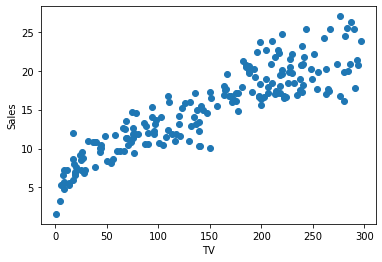

In [14]:
plt.scatter(x_selected, y)
plt.xlabel('TV')
plt.ylabel('Sales')
plt.show()

In [19]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x_selected,y,test_size=0.30,train_size=0.70)  #splitting data

In [20]:
reg=linear_model.LinearRegression()
reg.fit(x_train,y_train)

LinearRegression()

In [23]:
from sklearn.metrics import mean_absolute_error,r2_score,mean_squared_error
y_pred = reg.predict(x_train)

print(f'MAE = {mean_absolute_error(y_train, y_pred)}')
print(f'MSE = {mean_squared_error(y_train, y_pred)}')
print(f'RMSE = {np.sqrt(mean_squared_error(y_train, y_pred))}')
print(f'R_2 = {r2_score(y_train, y_pred)}')

MAE = 1.7537256205963256
MSE = 4.862516142263395
RMSE = 2.205111367315355
R_2 = 0.8225559796958717


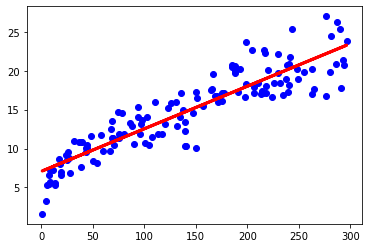

In [25]:
plt.scatter(x_train, y_train, color='blue')
plt.plot(x_train, reg.predict(x_train), color='red', linewidth=3)
plt.show()
     

In [26]:
from sklearn.metrics import mean_absolute_error,r2_score,mean_squared_error
y_pred = reg.predict(x_test)

print(f'MAE = {mean_absolute_error(y_test, y_pred)}')
print(f'MSE = {mean_squared_error(y_test, y_pred)}')
print(f'RMSE = {np.sqrt(mean_squared_error(y_test, y_pred))}')
print(f'R_2 = {r2_score(y_test, y_pred)}')

MAE = 2.015904213655763
MSE = 6.063942826901265
RMSE = 2.462507426770783
R_2 = 0.7823719218128532


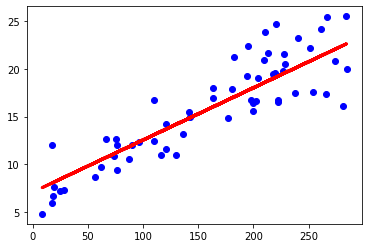

In [28]:
plt.scatter(x_test,y_test,color='blue')
plt.plot(x_test,reg.predict(x_test),color='red',linewidth=3)
plt.show()